In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
X, y = make_regression(n_samples=500, n_features=5, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
rf = RandomForestRegressor(n_estimators=50 , random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)

Random Forest Regression MSE: 858.3095585311629


In [46]:
def mse_loss(true, pred):
    return np.mean((true - pred) ** 2)


In [47]:
# Gradient of the loss function
def gradient(true, pred):
    return -2 * (true - pred) / len(true)

In [48]:
# Optimizers
learning_rate = 0.01
batch_size = 32

In [49]:
predicted_gd = np.zeros_like(y_train)
predicted_sgd = np.zeros_like(y_train)
predicted_mini_batch = np.zeros_like(y_train)

In [50]:
# To store losses for visualization
loss_gd = []
loss_sgd = []
loss_mini_batch = []


In [51]:
# Perform optimization
for epoch in range(100):
    # Gradient Descent (GD)
    grad_gd = gradient(y_train, predicted_gd)
    predicted_gd -= learning_rate * grad_gd
    loss_gd.append(mse_loss(y_train, predicted_gd))

In [52]:
  # Stochastic Gradient Descent (SGD)
  for i in range(len(y_train)):
    grad_sgd = gradient(y_train[i:i+1], predicted_sgd[i:i+1])
    predicted_sgd[i:i+1] -= learning_rate * grad_sgd
    loss_sgd.append(mse_loss(y_train, predicted_sgd))

In [53]:
  # Stochastic Gradient Descent (SGD)
  for i in range(len(y_train)):
    grad_sgd = gradient(y_train[i:i+1], predicted_sgd[i:i+1])
    predicted_sgd[i:i+1] -= learning_rate * grad_sgd
    loss_sgd.append(mse_loss(y_train, predicted_sgd))

In [54]:

    # Mini-batch Gradient Descent
    for i in range(0, len(y_train), batch_size):
        batch_true = y_train[i:i+batch_size]
        batch_pred = predicted_mini_batch[i:i+batch_size]
        grad_mini_batch = gradient(batch_true, batch_pred)
        predicted_mini_batch[i:i+batch_size] -= learning_rate * grad_mini_batch
    loss_mini_batch.append(mse_loss(y_train, predicted_mini_batch))

In [55]:
# Visualization of convergence
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

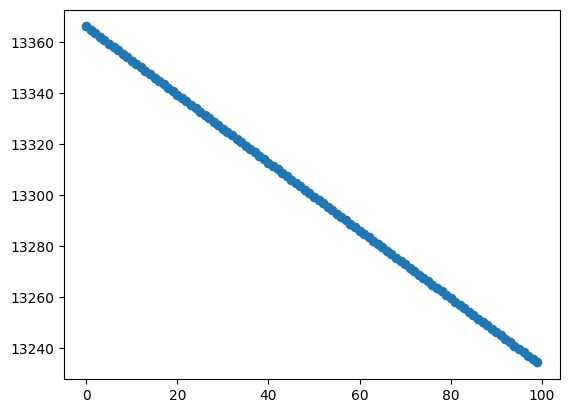

In [56]:
# Plot GD
plt.plot(range(100), loss_gd, label='Gradient Descent (GD)', marker='o')

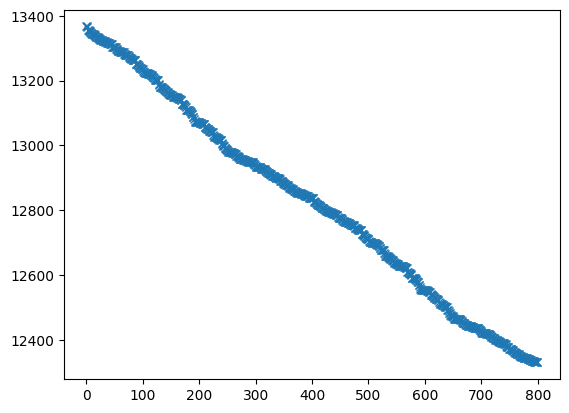

In [69]:
# Plot SGD
plt.plot(range(800), loss_sgd, label='Stochastic Gradient Descent (SGD)', marker='x')

In [82]:
len(loss_mini_batch)

1

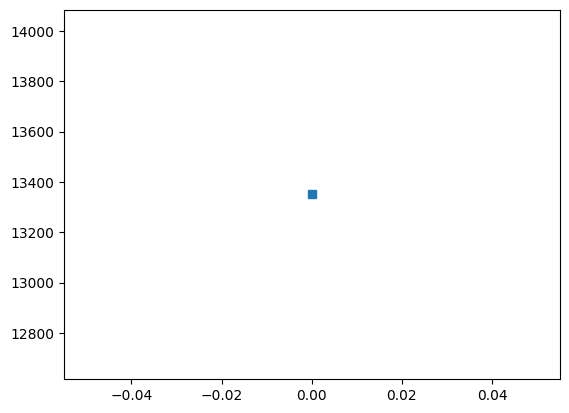

In [81]:
# Plot Mini-batch SGD
plt.plot(range(1), loss_mini_batch, label='Mini-batch SGD', marker='s')

In [62]:
print(len(loss_gd))

100


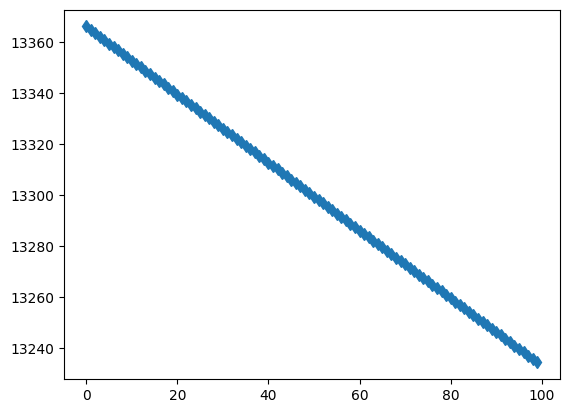

In [67]:
# Plot Adagrad
plt.plot(range(100), loss_gd, label='Adagrad', marker='d')


C:\Users\Prantik sanki\AppData\Local\Temp\ipykernel_22820\1388904734.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


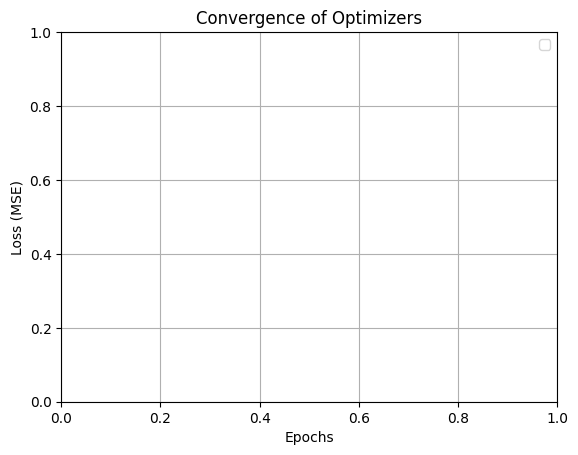

Final Losses:
Gradient Descent (GD): 13234.38038693604
Stochastic Gradient Descent (SGD): 12329.656267763017
Mini-batch SGD: 13350.300545162103
Adagrad: 13234.38038693604


In [83]:
# Customize plot
plt.title('Convergence of Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# Display final losses
print("Final Losses:")
print("Gradient Descent (GD):", loss_gd[-1])
print("Stochastic Gradient Descent (SGD):", loss_sgd[-1])
print("Mini-batch SGD:", loss_mini_batch[-1])
print("Adagrad:", loss_gd[-1])

In [74]:
X_train

array([[ 0.26256133, -0.81925786,  0.19358991, -0.47622087,  0.87438918],
       [ 0.69553776,  0.66874166,  0.84910211, -1.09170088, -0.3870997 ],
       [ 0.06980208,  0.46210347, -0.3853136 ,  0.1990597 , -0.60021688],
       ...,
       [-0.65000258, -0.13125697,  0.16865467,  0.07685188, -0.22485598],
       [ 0.89019841, -0.75849533,  1.03524933, -0.23040071, -0.92423314],
       [-0.62696706, -0.70317643,  1.81244856, -0.03498849,  1.77080064]],
      shape=(400, 5))

In [75]:
y_train

array([ -76.02194269,   22.64916892,   35.82189584, -331.88696585,
        114.26079056,   59.12280715,   25.23026427, -218.2249535 ,
        162.68350422,   66.83356617, -136.41499445,   53.57028491,
         47.15910169,   69.6822324 , -129.14187798, -140.48216436,
         98.82809644,  185.85950482, -122.37799411,   66.03188849,
        -44.71715875,  184.96162444,   26.50334633,  -61.61622673,
        102.40315823, -148.58443125,  -46.08810918,   97.69610135,
        106.21771664,  -90.43253508,  108.74403765,   92.64714947,
         66.15908881,   34.44168913,   86.0956272 , -112.26503029,
         35.50649376, -114.74072675,   75.74757611,   56.26211291,
        -26.73903349,   30.38883117, -193.35643391,  -49.61235244,
        -12.45624578,   54.71284523,  273.40114065, -123.63607034,
        -78.99787383,   44.97967199,  -13.13202777,   -6.63137633,
         29.52282945,  210.07256915,  -89.6414324 , -177.02781958,
       -139.36619797,   71.75520922,   68.91323661,   97.78836

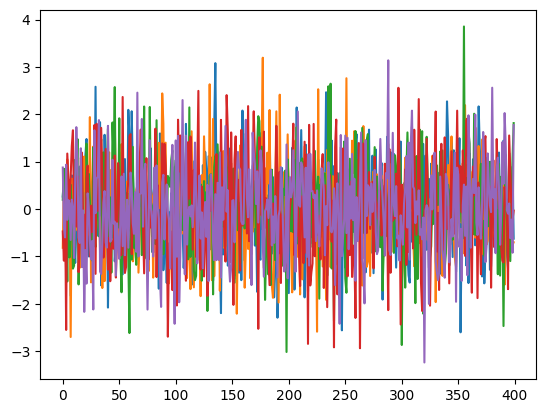

In [72]:
plt.plot(X_train )

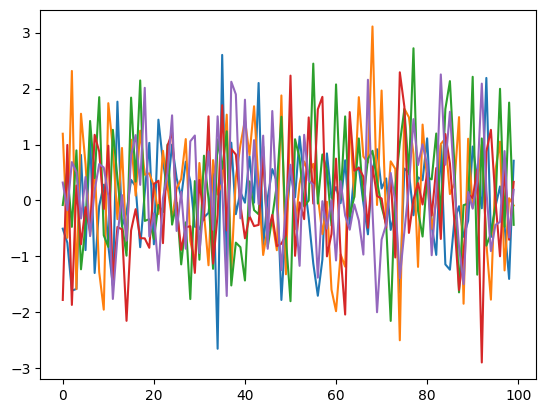

In [73]:
plt.plot(X_test)